**Import Libraries**

In [274]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm

**Data Exploration**




In [275]:
#read file
df = pd.read_csv("sample_data/test_data_accuracy.csv")
df.head()

,Tenure,market,accuracy,is_pass
0,60,ASE,100.00%,1
1,30,RW,0.00%,0
2,60,ASE,73.68%,0
3,60,ASE,91.67%,1
4,30,NM,57.14%,0


In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3065 entries, 0 to 3064
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Tenure    3065 non-null   object
 1   market    3065 non-null   object
 2   accuracy  3065 non-null   object
 3   is_pass   3065 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 95.9+ KB


In [277]:
df['market'].unique()

array(['ASE', 'RW', 'NM', 'FP'], dtype=object)

In [278]:
df['Tenure'].unique()

array(['60', '30', '90', '91+'], dtype=object)

In our dataset, Tenure column has 4 unique values which are 30, 60, 90 and 90+ and market has ASE, RW, NM, FP. Here, if the accuracy score is greater than or equal to 84%, it is pass or 1 else 0.

Let's calculate the average pass rate

In [279]:
df['is_pass'].value_counts()

0    1940
1    1125
Name: is_pass, dtype: int64

In [280]:
count_not_pass = len(df[df['is_pass']==0])
count_is_pass = len(df[df['is_pass']==1])
pct_of_not_pass = count_not_pass/(count_not_pass+count_is_pass)
print("percentage of not pass", pct_of_not_pass*100)
pct_of_is_pass = count_is_pass/(count_is_pass+count_not_pass)
print("percentage of is pass", pct_of_is_pass*100)

percentage of not pass 63.2952691680261
percentage of is pass 36.7047308319739


In [281]:
pass_rate = df.groupby(['market','Tenure'])['is_pass'].mean()
pass_rate

market  Tenure
ASE     60        0.666667
        90        0.666667
        91+       0.666667
FP      30        0.352941
        60        0.580645
        90        0.615385
        91+       0.521739
NM      30        0.287340
        60        0.376147
        90        0.347741
        91+       0.377537
RW      30        0.270833
        60        0.428571
        90        0.516667
        91+       0.524390
Name: is_pass, dtype: float64

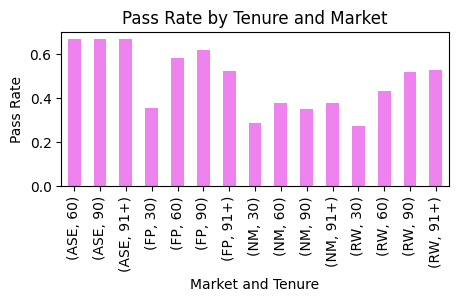

In [282]:
plt.figure(figsize=(5,2))
pass_rate.plot(kind='bar',color='violet')
plt.xlabel("Market and Tenure")
plt.ylabel("Pass Rate")
plt.title("Pass Rate by Tenure and Market")
plt.show()

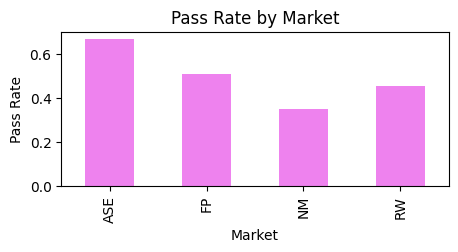

market
ASE    0.666667
FP     0.507317
NM     0.347025
RW     0.451220
Name: is_pass, dtype: float64

In [283]:
pass_rate_per_m = df.groupby('market')['is_pass'].mean()
pass_rate_per_m

plt.figure(figsize=(5,2))
pass_rate_per_m.plot(kind='bar',color='violet')
plt.xlabel("Market")
plt.ylabel("Pass Rate")
plt.title("Pass Rate by Market")
plt.show()
pass_rate_per_m

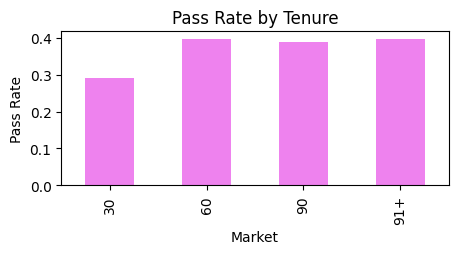

Tenure
30     0.291819
60     0.397419
90     0.387821
91+    0.396694
Name: is_pass, dtype: float64

In [284]:
pass_rate_per_t = df.groupby('Tenure')['is_pass'].mean()
pass_rate_per_t

plt.figure(figsize=(5,2))
pass_rate_per_t.plot(kind='bar',color='violet')
plt.xlabel("Market")
plt.ylabel("Pass Rate")
plt.title("Pass Rate by Tenure")
plt.show()
pass_rate_per_t

**Observation:**

In the above graphs, we see that the market with the highest pass rate is ASE. While based on Tenure, 30 has the lowest pass rate.

To test if market and tenure has a significant impact in passing the accuracy score, let us perform a Logistic Regression.

**Logistic Regression Model Fitting**

In [285]:
# Separate predictors (X) and target variable (y)
X = df[['Tenure','market']] #features
y = df['is_pass'] #target


In [286]:
# Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

In [287]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

Predicting the test set results and calculating the accuracy

In [288]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.65


In [289]:
# Add a constant term to the features
X_train = sm.add_constant(X_train)

# Fit logistic regression model using statsmodels to get p-values
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()

# Print summary statistics
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.648753
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                is_pass   No. Observations:                 2145
Model:                          Logit   Df Residuals:                     2138
Method:                           MLE   Df Model:                            6
Date:                Sat, 02 Mar 2024   Pseudo R-squ.:                 0.01336
Time:                        12:58:36   Log-Likelihood:                -1391.6
converged:                       True   LL-Null:                       -1410.4
Covariance Type:            nonrobust   LLR p-value:                 1.290e-06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1015      0.738      0.138      0.891      -1.345       1.548
Tenure_60      0.4135      0.

Confusion Matrix

In [290]:
# import the metrics class
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[569  14]
 [308  29]]


The result is telling us that we have 569+29 correct predictions and 308+29 incorrect predictions.




**Compute precision, recall, F-measure and support**

In [291]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.98      0.78       583
           1       0.67      0.09      0.15       337

    accuracy                           0.65       920
   macro avg       0.66      0.53      0.47       920
weighted avg       0.66      0.65      0.55       920



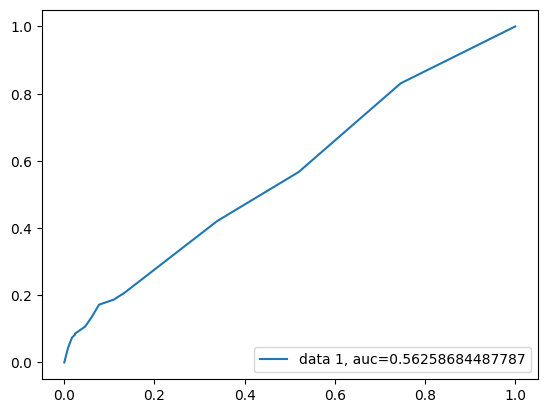

In [292]:
import matplotlib.pyplot as plt
from sklearn import metrics

y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

AUC = 0.5 would mean that the model's predictions are no better than random guessing.

AUC > 0.5 indicates that the model's predictions are better than random guessing.

AUC = 1 would indicate a perfect model where all positive instances are ranked higher than negative instances.

Since the AUC score is 58%, it suggests that this model has some ability to discriminate between the positive and negative classes, but the discrimination is relatively weak.

**In training a model, it's important to investigate further and potentially revise the approach to achieve desired output.**